In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series_train.csv', parse_dates=['data'], index_col='data')

In [3]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq', period=24*365)

# Additive Decomposition
result_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq',period=24*365)

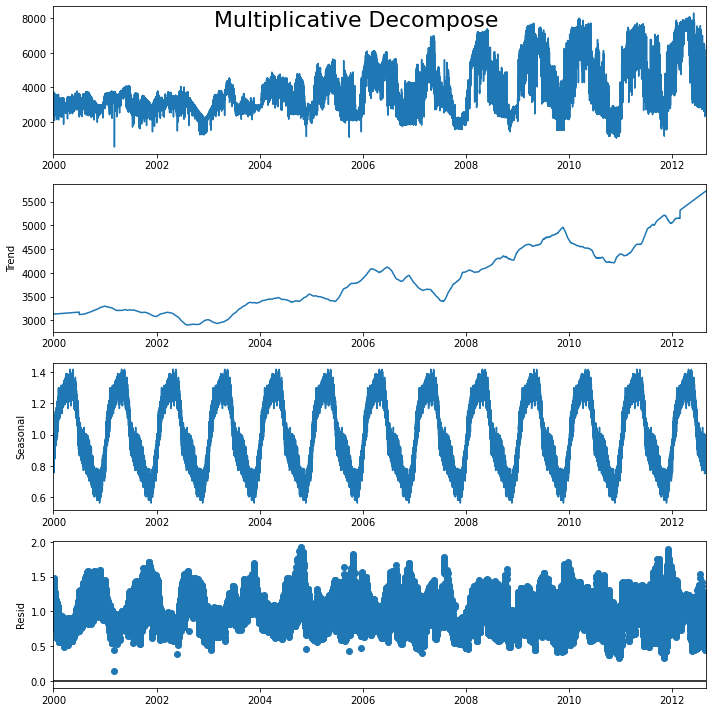

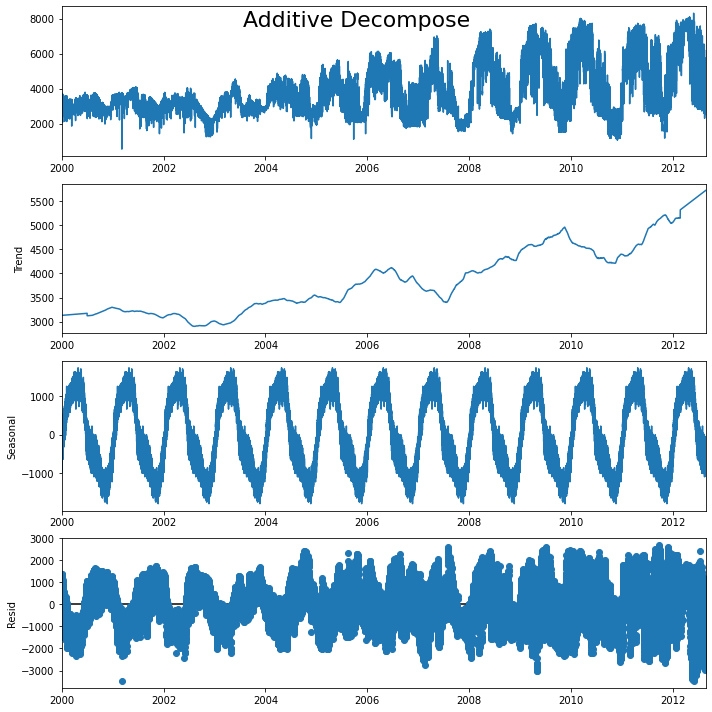

In [4]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [5]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
data,,,,
2000-01-01 00:00:00,0.890010,3130.850116,0.869374,2422.5
2000-01-01 01:00:00,0.900558,3130.859924,0.982188,2769.3
2000-01-01 02:00:00,0.922108,3130.869733,1.082334,3124.7
2000-01-01 03:00:00,0.934525,3130.879541,1.078169,3154.6
2000-01-01 04:00:00,0.938698,3130.889350,1.062212,3121.8
